# Demo Deep Belief Network para identificar TIPO de IRIS


0) Instalar paquete de DBN: 
( para más info ver https://github.com/albertbup/deep-belief-network/blob/master/README.md )

In [1]:
pip install git+git://github.com/albertbup/deep-belief-network.git

  Cloning git://github.com/albertbup/deep-belief-network.git to /tmp/pip-req-build-y5pisjrm
  Running command git clone -q git://github.com/albertbup/deep-belief-network.git /tmp/pip-req-build-y5pisjrm
  Created wheel for deep-belief-network: filename=deep_belief_network-1.0.3-cp36-none-any.whl size=13464 sha256=6a679c4cd3862eb7fe2ea0f3165e648de7b0196216234da1089eb7fa972ef432
  Stored in directory: /tmp/pip-ephem-wheel-cache-fzgtw9e5/wheels/29/6d/3b/6a50cf42a32bdfaa903b17832d60d8d3e5dc4b0fd02ae8acaf
Successfully built deep-belief-network


1) Cargar librerías:

In [2]:
# nota se debe indicar la versión 1 de TF para compatibilidad del código
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

from dbn.tensorflow import SupervisedDBNClassification
import numpy as np
import pandas as pd
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

print ("Librerías cargadas.")

TensorFlow 1.x selected.
1.15.2

Librerías cargadas.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


2) Configurar los datos cargados (se debe definir de acuerdo a los datos):

In [3]:
# define atributos y clases
CSV_COLUMN_NAMES = ['LargoSepalo', 'AnchoSepalo', 'LargoPetalo', 'AnchoPetalo', 'Clase']
CLASSES = ['Setosa', 'Versicolor', 'Virginica']

ClassAttributeName = 'Clase'

print("Configuración definida.")

Configuración definida.


3) Cargar CSV con datos a procesar y preparar datos para entrenar y probar (ya separados):

In [4]:
# levanta los datos de entrenamiento y prueba
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

# ver datos
train.head()
#test.head()

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


,LargoSepalo,AnchoSepalo,LargoPetalo,AnchoPetalo,Clase
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [5]:
# define datos de entrada y salida para entrenamiento
X_train = np.array(train.drop([ClassAttributeName], axis=1))
Y_train = np.array(train[ClassAttributeName])

# define datos de entrada y salida para testing
X_test = np.array(test.drop([ClassAttributeName], axis=1))
Y_test = np.array(test[ClassAttributeName])

print("\n\nDatos Originales ", len(X_train)+len(X_test))
print("- Datos para Entrenar ", len(X_train))
print("- Datos para Probar ", len(X_test))



Datos Originales  150
- Datos para Entrenar  120
- Datos para Probar  30


4) Especificar el modelo para la DBN:

In [6]:
classifier = SupervisedDBNClassification(hidden_layers_structure=[512, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=100,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)

print(classifier)

SupervisedDBNClassification(batch_size=32, dropout_p=0.2, idx_to_label_map=None,
                            l2_regularization=1.0, label_to_idx_map=None,
                            learning_rate=0.1, n_iter_backprop=100,
                            verbose=True)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


5) Entrenar el modelo de la DBN:

In [7]:
classifier.fit(X_train, Y_train)

[START] Pre-training step:



Instructions for updating:
Use `tf.cast` instead.


>> Epoch 1 finished 	RBM Reconstruction error 8.005116
>> Epoch 2 finished 	RBM Reconstruction error 486.549299
>> Epoch 3 finished 	RBM Reconstruction error 506.482418
>> Epoch 4 finished 	RBM Reconstruction error 448.115477
>> Epoch 5 finished 	RBM Reconstruction error 337.650484
>> Epoch 6 finished 	RBM Reconstruction error 361.619542
>> Epoch 7 finished 	RBM Reconstruction error 413.343223
>> Epoch 8 finished 	RBM Reconstruction error 326.883857
>> Epoch 9 finished 	RBM Reconstruction error 322.201385
>> Epoch 10 finished 	RBM Reconstruction error 458.508123
>> Epoch 1 finished 	RBM Reconstruction error 147.644333
>> Epoch 2 finished 	RBM Reconstruction error 72675.906250
>> Epoch 3 finished 	RBM Reconstruction error 91192.101562
>> Epoch 4 finished 	RBM Reconstruction error 92810.343750
>> Epoch 5 finished 	RBM Reconstruction error 92840.851562
>> Epoch 6 finished 	RBM Reconstruction error 86932.4453

SupervisedDBNClassification(batch_size=32, dropout_p=0.2,
                            idx_to_label_map={0: 2, 1: 1, 2: 0},
                            l2_regularization=1.0,
                            label_to_idx_map={0: 2, 1: 1, 2: 0},
                            learning_rate=0.1, n_iter_backprop=100,
                            verbose=True)

6) Evaluar el modelo de la RNA entrenado:


Exactitud: 0.966667

 Resultados: 
Clase predecida es "Versicolor"[1], la correcta es "Versicolor"[1] 
Clase predecida es "Virginica"[2], la correcta es "Virginica"[2] 
Clase predecida es "Setosa"[0], la correcta es "Setosa"[0] 
Clase predecida es "Versicolor"[1], la correcta es "Versicolor"[1] 
Clase predecida es "Versicolor"[1], la correcta es "Versicolor"[1] 
Clase predecida es "Versicolor"[1], la correcta es "Versicolor"[1] 
Clase predecida es "Setosa"[0], la correcta es "Setosa"[0] 
Clase predecida es "Virginica"[2], la correcta es "Virginica"[2] 
Clase predecida es "Versicolor"[1], la correcta es "Versicolor"[1] 
Clase predecida es "Virginica"[2], la correcta es "Virginica"[2] 
Clase predecida es "Virginica"[2], la correcta es "Virginica"[2] 
Clase predecida es "Setosa"[0], la correcta es "Setosa"[0] 
Clase predecida es "Virginica"[2], la correcta es "Virginica"[2] 
Clase predecida es "Versicolor"[1], la correcta es "Versicolor"[1] 
Clase predecida es "Versicolor"[1], la correct

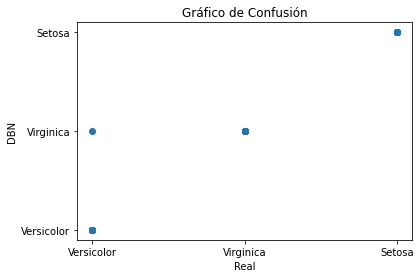

In [8]:
# ejecuta el  modelo
Y_pred = classifier.predict(X_test)

# calcula la exactitud
print('\nExactitud: %f' % accuracy_score(Y_test, Y_pred))

# muestra resultados de la predicción
classPreds = []
classReal = []
cantOK = 0
cantError = 0
print("\n Resultados: ")
for pred_class_id, expec in zip(Y_pred, Y_test):
    
    classPreds.append(CLASSES[pred_class_id])
    classReal.append(CLASSES[expec])

    if (pred_class_id == expec): 
      res = ""
      cantOK += 1
    else: 
      res = "!"
      cantError += 1

    print('Clase predecida es "{}"[{}], la correcta es "{}"[{}]{} '.format(
        CLASSES[pred_class_id], pred_class_id, CLASSES[expec], expec, res))

print('=== Total Ejemplos: {}, con {} predicciones ok y {} errores.'.format(cantOK+cantError, cantOK, cantError))

# gráfico de comparación
plt.title('Gráfico de Confusión')
plt.xlabel('Real')
plt.ylabel('DBN')
plt.scatter(classReal, classPreds)

# muestra reporte de clasificación
print("\n Reporte de Clasificación: ")
print(classification_report(classReal, classPreds))

# muestra matriz de confusion
print('\nMatriz de Confusión: ')
cm = confusion_matrix(classReal, classPreds, labels=CLASSES)
cmtx = pd.DataFrame(
    cm, 
    index=['r:{:}'.format(x) for x in CLASSES], 
    columns=['p:{:}'.format(x) for x in CLASSES]
  )
print(cmtx)
print("\n")


*) Hacer pruebas de predicciones:

In [9]:
# define ejemplos de prueba
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = [ [5.1, 3.3, 1.7, 0.5], [5.9, 3.0, 4.2, 1.5], [6.9, 3.1, 5.4, 2.1]]

print(predict_x)
print(expected)

[[5.1, 3.3, 1.7, 0.5], [5.9, 3.0, 4.2, 1.5], [6.9, 3.1, 5.4, 2.1]]
['Setosa', 'Versicolor', 'Virginica']


In [10]:
# ejecuta el  modelo
predictions = classifier.predict(predict_x)

# muestra resultados de la predicción
for expec_class, pred in zip(expected, predictions):

  # muestra resultados
  print('Clase predecida es "{}", la correcta es "{}"'.format(
        CLASSES[pred],  expec_class))

Clase predecida es "Setosa", la correcta es "Setosa"
Clase predecida es "Versicolor", la correcta es "Versicolor"
Clase predecida es "Virginica", la correcta es "Virginica"
